Spotify Music Analysis

In [77]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from pandas.plotting import autocorrelation_plot
#import seaborn as sns
#from pandas.plotting import scatter_matrix
#from pandas.plotting import autocorrelation_plot
#from pandas.plotting import parallel_coordinates
#from pandas.plotting import lag_plot

In [78]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [79]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [81]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [82]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [83]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [84]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: top genre, Length: 132, dtype: int64

In [85]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [86]:
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [87]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


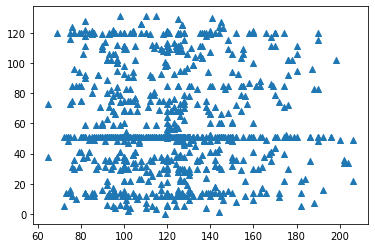

In [88]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

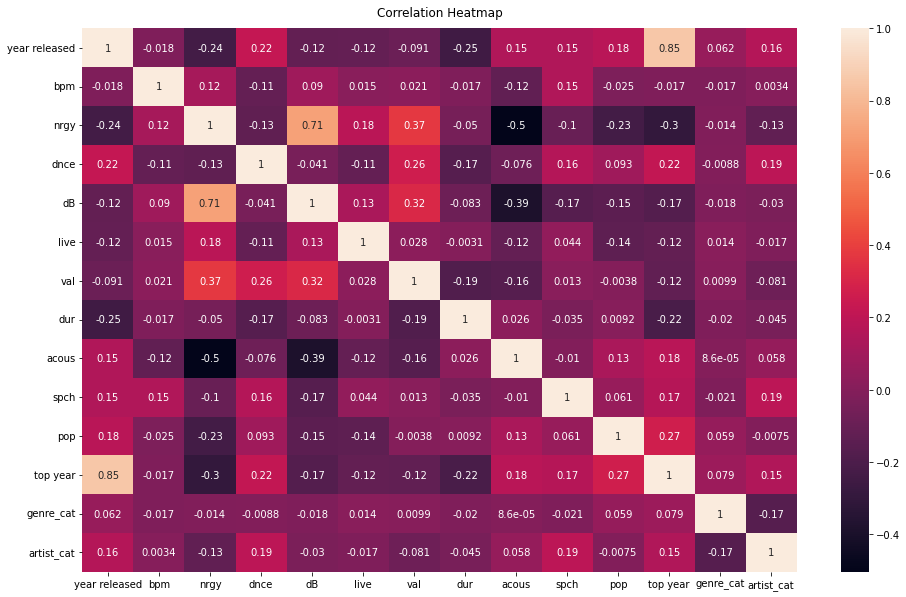

In [89]:
import seaborn as sns

plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()

There is a high correlation between genre and top year. This implies that certain genres are popular in a specific year.

# Recommendation System using K-means Clustering

In [90]:
df = df.drop_duplicates(subset='title')
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat,artist_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0,2.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0,2.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019,85,67,77,-6,6,71,171,1,6,81,2019,Solo,120.0,2.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0,2.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0,2.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0,1.0


In [91]:
df_subset = df[['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']]
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79
...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67


In [92]:
import copy
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [93]:
df1=copy.deepcopy(df_subset)
df1.drop(columns=['title','artist','top genre', 'pop'],inplace=True)
df1

,bpm,nrgy,dnce,dB,live,val,acous,spch
0,140,81,61,-6,23,23,0,6
1,138,89,68,-4,36,83,1,8
2,95,48,84,-7,9,96,20,3
3,93,87,66,-4,4,38,11,12
4,104,85,69,-6,9,74,39,5
...,...,...,...,...,...,...,...,...
994,85,67,77,-6,6,71,1,6
996,80,50,55,-9,80,41,23,7
997,103,77,89,-5,9,46,1,7
998,138,58,53,-6,10,59,1,10


In [94]:
#from sklearn.preprocessing import MinMaxScaler

d_types = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
normalize = df1.select_dtypes(include=d_types)
print(normalize)

normalize = (normalize - normalize.min()) / (normalize.max() - normalize.min())

print(normalize)

     bpm  nrgy  dnce  dB  live  val  acous  spch
0    140    81    61  -6    23   23      0     6
1    138    89    68  -4    36   83      1     8
2     95    48    84  -7     9   96     20     3
3     93    87    66  -4     4   38     11    12
4    104    85    69  -6     9   74     39     5
..   ...   ...   ...  ..   ...  ...    ...   ...
994   85    67    77  -6     6   71      1     6
996   80    50    55  -9    80   41     23     7
997  103    77    89  -5     9   46      1     7
998  138    58    53  -6    10   59      1    10
999   98    59    80  -7    13   18      2    15

[945 rows x 8 columns]
          bpm      nrgy      dnce        dB      live       val     acous  \
0    0.531915  0.815217  0.545455  0.705882  0.259259  0.204301  0.000000   
1    0.517730  0.902174  0.636364  0.823529  0.419753  0.849462  0.010204   
2    0.212766  0.456522  0.844156  0.647059  0.086420  0.989247  0.204082   
3    0.198582  0.880435  0.610390  0.823529  0.024691  0.365591  0.112245   
4  

In [95]:
rand_seed = random.seed(42)

In [96]:
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()
params = {"n_clusters": list(range(1, 101)),}

grid_clf = GridSearchCV(estimator=kmeans, param_grid=params, cv=5, verbose=2)
grid_clf.fit(normalize)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [97]:
# optimal value for k (kmeans_n_cluster)
grid_clf.best_params_

{'n_clusters': 98}

In [99]:
k = 98
km = KMeans(n_clusters=k, random_state=rand_seed)
predict = km.fit_predict(normalize)

df_subset['predict'] = predict
#MinMaxScaler(df_subset['predict'])

predict

array([97, 17, 56, 19, 22, 42, 45, 11,  1, 19, 52, 12, 70, 95, 41, 25,  4,
       81,  2, 34, 22, 46, 45, 69, 12, 76, 95, 66, 13, 70, 65, 79, 17,  0,
        0,  1, 27, 38,  2, 34, 34, 46, 29,  0,  0, 45, 81, 20, 12,  0, 24,
       42, 42, 35, 20, 16, 51, 29, 76, 91, 21, 34, 49, 90, 32, 40, 97, 22,
       46,  0, 66, 56, 22, 34, 54, 67, 41, 97, 64, 65, 91, 30, 91, 21, 41,
       39, 68, 10, 97, 20, 94, 84, 51, 65, 41, 13, 19, 35,  0, 47, 90, 19,
       12, 12, 33, 45, 70, 23, 33, 49, 23, 54, 68, 27,  1, 92, 51, 46, 62,
       47, 12,  4, 31, 12, 39,  4, 41, 67, 25, 46, 50, 95,  1, 85, 30, 97,
       20, 97, 24, 97, 67, 24, 20, 20, 22, 19, 65, 34, 48, 46, 25, 51, 65,
       29, 15, 92, 34,  0, 25,  1, 46, 63, 42, 64, 13, 78, 41, 15, 63, 17,
        2, 54, 63, 49, 45, 16, 67, 81, 34, 29, 76, 59, 54,  0, 34, 20,  0,
       67, 20,  0, 63, 12, 66, 76,  3, 10, 31, 72,  4, 66, 64, 51, 43, 46,
       65, 18,  2, 17,  1, 12, 17,  7, 43, 66, 45, 65, 16, 45, 54, 34, 32,
       73, 14, 65, 29, 41

In [100]:
class Song_recommendation():
    def __init__(self, data):
        self.data = data
    
    def recommend_song(self, songs, amount=1):
    # recommend songs name of song given
        distance = []
        song = self.data[(self.data.title.str.lower() == songs.lower())].head(1).values[0]
        rec = self.data[self.data.title.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

    def recommend_artist(self, artists, amount=1):
    # recommend songs from other artists based on the name of artist given
        distance = []
        artist = self.data[(self.data.artist.str.lower() == artists.lower())].head(1).values[0]
        rec = self.data[self.data.artist.str.lower() != artists.lower()]
        for artists in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(artist[col]) - float(artists[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

In [101]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Over", 10)  # Canadian Hip Hop, Drake

100%|██████████| 944/944 [00:00<00:00, 41041.77it/s]


,artist,title,top genre
624,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room
484,Sia,Elastic Heart,australian dance
501,Alessia Cara,Here,canadian contemporary r&b
483,Sia,Chandelier,australian dance
545,Luke Christopher,Lot to Learn,indie pop rap
121,Chris Brown,Beautiful People,dance pop
530,Galantis,Runaway (U & I),dance pop
199,Wiz Khalifa,Roll Up,dance pop
202,Alesso,Years,dance pop
689,The Chainsmokers,Don't Let Me Down,dance pop


In [102]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Animal", 10) # modern alternative rock, Neon Trees

100%|██████████| 944/944 [00:00<00:00, 39332.67it/s]


,artist,title,top genre
307,Avril Lavigne,Here's to Never Growing Up,canadian pop
196,Usher,More - RedOne Jimmy Joker Remix,atl hip hop
263,Neon Trees,Everybody Talks,modern alternative rock
464,Oliver Heldens,Gecko (Overdrive) - Radio Edit,dance pop
367,Michael Bublé,It's a Beautiful Day,adult standards
25,Example,Kickstarts,dance pop
271,Owl City,Good Time,indietronica
272,P!nk,Blow Me (One Last Kiss),dance pop
390,The 1975,Chocolate,modern alternative rock
504,Avicii,The Nights,dance pop


In [103]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Riverside", 10) # dutch house, Sidney Samson

100%|██████████| 944/944 [00:00<00:00, 41099.29it/s]


,artist,title,top genre
685,Steve Aoki,Just Hold On,dance pop
311,Bastille,Of The Night,metropopolis
621,Clean Bandit,Tears (feat. Louisa Johnson),dance pop
660,Marshmello,Alone,brostep
599,Zedd,I Want You To Know,complextro
911,Ashley O,On A Roll,pop
760,Macklemore,Glorious (feat. Skylar Grey),pop rap
559,Philip George,Wish You Were Mine - Radio Edit,deep groove house
772,PNAU,Chameleon,alternative dance
225,DJ Fresh,Hot Right Now - Edit,dancefloor dnb


In [104]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("If I die young", 10) # contemporary country, the band perry

100%|██████████| 944/944 [00:00<00:00, 41049.43it/s]


,artist,title,top genre
36,John Mayer,Heartbreak Warfare,neo mellow
586,Thomas Rhett,Die A Happy Man,contemporary country
656,Lukas Graham,7 Years,danish pop
297,Usher,Climax,atl hip hop
356,Kodaline,High Hopes,irish pop
950,Lana Del Rey,Doin' Time,art pop
949,Lady Gaga,Shallow,art pop
602,Adele,Hello,british soul
303,Arctic Monkeys,Do I Wanna Know?,garage rock
85,Timbaland,Carry Out (Featuring Justin Timberlake),dance pop


In [105]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("mine", 10) # pop , taylor swift

100%|██████████| 944/944 [00:00<00:00, 41043.47it/s]


,artist,title,top genre
219,Chris Brown,Turn Up the Music,dance pop
147,Jason Derulo,Don't Wanna Go Home,dance pop
30,Jason Derulo,Whatcha Say,dance pop
393,The Saturdays,What About Us,bubblegum dance
566,Robin Schulz,Sugar (feat. Francesco Yates),dance pop
871,MK,17,dance pop
228,Ellie Goulding,Lights - Single Version,dance pop
704,AJR,Weak,modern rock
183,Red Hot Chili Peppers,The Adventures of Rain Dance Maggie,alternative rock
153,Katy Perry,Firework,dance pop


In [106]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Dynamite", 10) # dance pop, taio cruz

100%|██████████| 944/944 [00:00<00:00, 39335.79it/s]


,artist,title,top genre
268,One Direction,What Makes You Beautiful,boy band
454,Maroon 5,Sugar,pop
452,Maroon 5,Maps,pop
244,Karmin,Brokenhearted,dance pop
328,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,electro
629,DNCE,Cake By The Ocean,dance pop
323,Capital Cities,Safe And Sound,metropopolis
281,Robbie Williams,Candy,dance pop
811,Bruno Mars,Finesse - Remix; feat. Cardi B,dance pop
729,French Montana,Unforgettable,gangster rap


In [107]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("hard", 10) # barbarian pop, rihanna

100%|██████████| 944/944 [00:00<00:00, 41092.46it/s]


,artist,title,top genre
282,Rudimental,Feel the Love (feat. John Newman),dance pop
453,Maroon 5,Animals,pop
343,Imagine Dragons,Radioactive,modern rock
309,Baauer,Harlem Shake,bass trap
279,Rita Ora,R.I.P. (feat. Tinie Tempah),dance pop
251,Lana Del Rey,Ride,art pop
546,Major Lazer,Lean On,dance pop
402,Alesso,Heroes (we could be),dance pop
752,Little Mix,Touch (feat. Kid Ink),dance pop
51,Lil Wayne,Right Above It,hip hop


In [108]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad romance", 10) # art pop by lady gaga

100%|██████████| 944/944 [00:00<00:00, 41041.35it/s]


,artist,title,top genre
246,Katy Perry,Part Of Me,dance pop
376,Paramore,Still into You,candy pop
120,Chris Brown,Yeah 3x,dance pop
412,Calvin Harris,Summer,dance pop
362,Macklemore & Ryan Lewis,Can't Hold Us (feat. Ray Dalton),dance pop
321,Calvin Harris,Thinking About You (feat. Ayah Marar),dance pop
528,Flo Rida,GDFR (feat. Sage the Gemini & Lookas),dance pop
24,Enrique Iglesias,I Like It,dance pop
258,MARINA,How to Be a Heartbreaker,art pop
123,Cobra Starship,You Make Me Feel... (feat. Sabi),dance pop


In [109]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("baby", 10) # canadian pop, justin beiber

100%|██████████| 944/944 [00:00<00:00, 39327.59it/s]


,artist,title,top genre
880,Rae Sremmurd,Powerglide (feat. Juicy J) - From SR3MM,hip hop
781,Sean Paul,No Lie,dance pop
406,Ariana Grande,Problem,dance pop
280,Rizzle Kicks,Mama Do The Hump,uk hip hop
198,Wiz Khalifa,Black and Yellow,dance pop
929,Dua Lipa,Don't Start Now,dance pop
210,B.o.B,So Good,atl hip hop
671,P!nk,Just Like Fire (From the Original Motion Pictu...,dance pop
292,Train,Drive By,dance pop
812,Calvin Harris,One Kiss (with Dua Lipa),dance pop


In [110]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Memories (feat. Kid Cudi)", 15) # david guetta, big room

100%|██████████| 944/944 [00:00<00:00, 42906.16it/s]


,artist,title,top genre
131,Dr. Dre,I Need A Doctor,g funk
824,DJ Khaled,No Brainer,dance pop
337,Eminem,Berzerk,detroit hip hop
800,5 Seconds of Summer,Youngblood,boy band
26,Far East Movement,Like A G6,asian american hip hop
0,3OH!3,STARSTRUKK (feat. Katy Perry),dance pop
300,2 Chainz,We Own It (Fast & Furious),atl hip hop
375,P!nk,True Love (feat. Lily Allen),dance pop
275,Phillip Phillips,Home,folk-pop
594,WALK THE MOON,Shut Up and Dance,dance pop


In [111]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("rolling in the deep", 10) # british soul, adele

100%|██████████| 944/944 [00:00<00:00, 39281.55it/s]


,artist,title,top genre
583,The Weeknd,Can't Feel My Face,canadian contemporary r&b
63,Rihanna,What's My Name?,barbadian pop
577,Taylor Swift,Blank Space,pop
905,Anuel AA,China,latin
259,Maroon 5,One More Night,pop
864,Marshmello,Happier,brostep
852,Kendrick Lamar,All The Stars (with SZA),conscious hip hop
931,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),pop
336,Eminem,The Monster,detroit hip hop
436,Iggy Azalea,Black Widow,australian hip hop


In [112]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Taylor Swift", 10) # pop

100%|██████████| 927/927 [00:00<00:00, 40303.51it/s]


,artist,title,top genre
968,Miley Cyrus,Slide Away,dance pop
607,Ariana Grande,Dangerous Woman,dance pop
204,alt-J,Breezeblocks,indie rock
698,Zara Larsson,Never Forget You,dance pop
106,Beyoncé,Best Thing I Never Had,dance pop
169,M83,Midnight City,french shoegaze
803,Ariana Grande,God is a woman,dance pop
775,Post Malone,I Fall Apart,dfw rap
365,Maroon 5,Daylight,pop
203,Alex Clare,Too Close,modern alternative rock


In [113]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Maroon 5", 10) # pop

100%|██████████| 934/934 [00:00<00:00, 40565.80it/s]


,artist,title,top genre
339,Flo Rida,I Cry,dance pop
547,Major Lazer,Light It Up - Remix,dance pop
314,Bridgit Mendler,Ready or Not,dance pop
321,Calvin Harris,Thinking About You (feat. Ayah Marar),dance pop
245,Katy Perry,The One That Got Away,dance pop
239,Imagine Dragons,It's Time,modern rock
639,Galantis,No Money,dance pop
187,Rizzle Kicks,Down With The Trumpets,uk hip hop
120,Chris Brown,Yeah 3x,dance pop
214,Calvin Harris,Let's Go (feat. Ne-Yo),dance pop


In [114]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Sara Bareilles", 10) # acoustic pop

100%|██████████| 944/944 [00:00<00:00, 41066.46it/s]


,artist,title,top genre
72,Sugarland,Stuck Like Glue,contemporary country
83,The Wanted,All Time Low,boy band
989,Shawn Mendes,If I Can't Have You,canadian pop
720,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),dance pop
4,B.o.B,Nothin' on You (feat. Bruno Mars),atl hip hop
522,Ellie Goulding,On My Mind,dance pop
890,Tiësto,Jackie Chan,big room
702,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),melodic rap
145,Jason Aldean,Dirt Road Anthem,contemporary country
893,Vance Joy,Saturday Sun,folk-pop


In [115]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Ellie Goulding", 10) # dance pop

100%|██████████| 941/941 [00:00<00:00, 39207.28it/s]


,artist,title,top genre
68,Scouting For Girls,This Ain't a Love Song,dance pop
84,Tim Berg,Seek Bromance (Avicii Vocal Edit),edm
516,Disclosure,Omen - Radio Edit,edm
790,The Vamps,All Night,boy band
598,Years & Years,King,dance pop
369,Mumford & Sons,I Will Wait,modern folk rock
41,Kelly Rowland,Commander,atl hip hop
306,Avicii,I Could Be The One (Avicii Vs. Nicky Romero) -...,dance pop
402,Alesso,Heroes (we could be),dance pop
117,Chase & Status,Blind Faith,dancefloor dnb


In [116]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Who's That Chick? (feat. Rihanna)", 10) # big room, david guetta

100%|██████████| 944/944 [00:00<00:00, 39332.28it/s]


,artist,title,top genre
244,Karmin,Brokenhearted,dance pop
811,Bruno Mars,Finesse - Remix; feat. Cardi B,dance pop
17,Drake,Find Your Love,canadian hip hop
281,Robbie Williams,Candy,dance pop
353,Katy Perry,This Is How We Do,dance pop
562,Rich Homie Quan,"Flex (Ooh, Ooh, Ooh)",atl hip hop
452,Maroon 5,Maps,pop
228,Ellie Goulding,Lights - Single Version,dance pop
548,Mark Ronson,Uptown Funk (feat. Bruno Mars),dance pop
75,Taio Cruz,Dynamite,dance pop


In [117]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Every Teardrop Is a Waterfall", 10) # coldplay, permanent wave

100%|██████████| 944/944 [00:00<00:00, 39329.54it/s]


,artist,title,top genre
372,Of Monsters and Men,Little Talks,folk-pop
484,Sia,Elastic Heart,australian dance
530,Galantis,Runaway (U & I),dance pop
383,Sebastian Ingrosso,Reload - Radio Edit,dance pop
202,Alesso,Years,dance pop
221,Coldplay,Princess of China,permanent wave
501,Alessia Cara,Here,canadian contemporary r&b
624,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room
797,Zara Larsson,I Would Like,dance pop
787,Taylor Swift,...Ready For It?,pop


In [118]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad at love", 15) # halsey

100%|██████████| 944/944 [00:00<00:00, 39331.10it/s]


,artist,title,top genre
859,Loud Luxury,Body,dance pop
185,Rihanna,We Found Love,barbadian pop
40,Katy Perry,Teenage Dream,dance pop
224,Disclosure,Latch,edm
19,Edward Maya,Stereo Love - Radio Edit,romanian house
157,Kesha,We R Who We R,dance pop
556,One Direction,Drag Me Down,boy band
757,lovelytheband,broken,indie poptimism
148,Jennifer Lopez,On The Floor,dance pop
179,P!nk,Raise Your Glass,dance pop


In [119]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Rihanna", 10) # barbadian pop

100%|██████████| 933/933 [00:00<00:00, 44431.29it/s]


,artist,title,top genre
556,One Direction,Drag Me Down,boy band
148,Jennifer Lopez,On The Floor,dance pop
859,Loud Luxury,Body,dance pop
633,Fifth Harmony,Work from Home (feat. Ty Dolla $ign),dance pop
179,P!nk,Raise Your Glass,dance pop
843,Halsey,Bad At Love,dance pop
19,Edward Maya,Stereo Love - Radio Edit,romanian house
736,Imagine Dragons,Believer,modern rock
157,Kesha,We R Who We R,dance pop
329,Daft Punk,Lose Yourself to Dance (feat. Pharrell Williams),electro


# K-Means to Generate a Rating Column

In [121]:
df_subset.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70,97
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68,17
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72,56
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80,19
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79,22


In [122]:
normalize_cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']
df_subset[normalize_cols] = df_subset[normalize_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [123]:
df_subset.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,97
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,17
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,56
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,19
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,22


In [124]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

rating_train, rating_test = train_test_split(df_subset, train_size=0.7, random_state=42)

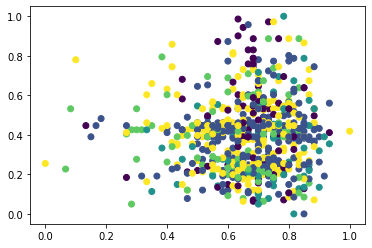

In [125]:
import matplotlib.pyplot as plt

rating_kmeans = KMeans(n_clusters=5, random_state=42)
rating_fit = rating_kmeans.fit_predict(rating_train.iloc[:, 3:11])
rating_predict = rating_kmeans.predict(rating_test.iloc[:, 3:11])

plt.scatter(rating_train.iloc[:, 11], rating_train.iloc[:, 3], c=rating_fit)
plt.show()

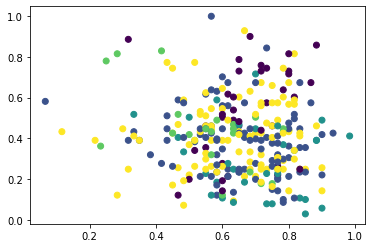

In [126]:
plt.scatter(rating_test.iloc[:, 11], rating_test.iloc[:, 3], c=rating_predict)
plt.show()

In [127]:
rating_train['rating'] = rating_fit.tolist()

In [128]:
rating_train.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
293,50 Ways to Say Goodbye,Train,dance pop,0.531915,0.956522,0.519481,0.882353,0.148148,0.752688,0.000000,0.058824,0.633333,12,1
460,Jealous - Remix,Nick Jonas,dance pop,0.198582,0.706522,0.636364,0.823529,0.518519,0.440860,0.010204,0.117647,0.600000,37,3
417,New Flame (feat. Usher & Rick Ross),Chris Brown,dance pop,0.546099,0.619565,0.662338,0.823529,0.098765,0.440860,0.051020,0.039216,0.633333,68,4
440,Don't Tell 'Em,Jeremih,chicago rap,0.234043,0.510870,0.870130,0.764706,0.111111,0.376344,0.397959,0.156863,0.750000,9,2
891,SICKO MODE,Travis Scott,hip hop,0.638298,0.728261,0.831169,0.823529,0.123457,0.440860,0.010204,0.392157,0.850000,47,0


In [129]:
rating_train_subset = rating_train[['title', 'rating']]
rating_train_subset.head()

,title,rating
293,50 Ways to Say Goodbye,1
460,Jealous - Remix,3
417,New Flame (feat. Usher & Rick Ross),4
440,Don't Tell 'Em,2
891,SICKO MODE,0


In [130]:
rating_test['rating'] = rating_predict.tolist()

In [131]:
rating_test_subset = rating_test[['title', 'rating']]
rating_test_subset.head()

,title,rating
897,If You're Over Me,1
343,Radioactive,3
287,I Knew You Were Trouble.,1
30,Whatcha Say,1
169,Midnight City,4


In [132]:
ratings = pd.concat([rating_train_subset, rating_test_subset])

In [133]:
len(ratings)

945

Data with ratings

In [134]:
df_subset_with_ratings = df_subset.merge(ratings)
len(df_subset_with_ratings)

945

In [135]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,97,4
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,17,3
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,56,1
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,19,4
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,22,1


In [136]:
df_subset_with_ratings['rating'] = df_subset_with_ratings['rating'] + 1

In [137]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,97,5
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,17,4
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,56,2
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,19,5
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,22,2


df_subset_with_ratings now has 1-5 "star" ratings for each song that has been generated by creating 5 clusters through k-means.